In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import minimize_scalar

In [2]:
G = 9.80665

Missile start point: (-0.17320508075688773; 0.09999999999999998)
Weight start point: (0.04330127018922193; 0.22500000000000003)
Missile release point: (-0.1414213562373095; 0.3414213562373095)
Weight release point: (0.035355339059327376; 0.16464466094067262)
Launching missile with angle: 45.00 degrees and v0: 2.94 m/s
Vx: 2.0756006136010137, Vy: 2.0756006136010137
Flight time: 0.549923404704062 s, x_move: 1.1414213562373097 m, y_move: -0.3414213562373094 m
Landed in: (1.0000000000000002; 0.0)


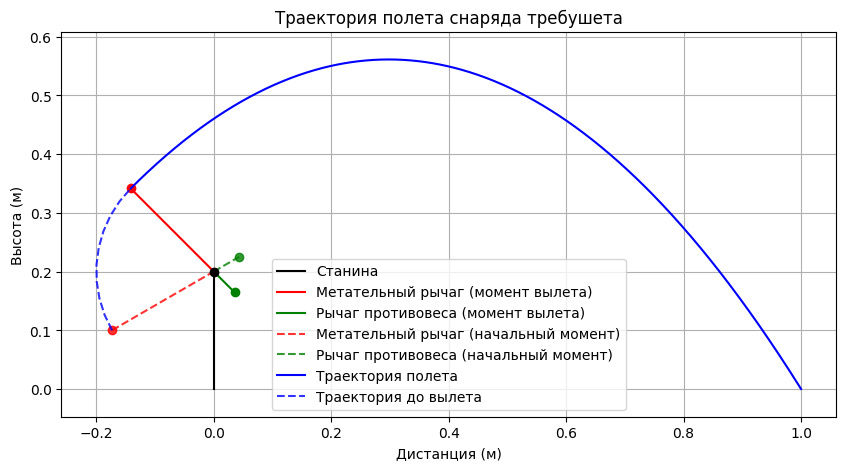

In [ ]:
class Trebuchet:
    def __init__(self, arm_ratio, frame_height, arm_length, start_angle, release_angle, missile_mass, arm_mass):
        self.frame_height = frame_height    # Высота вала
        self.arm_ratio = arm_ratio          # Доля рычага, относящаяся к весу
        self.arm_length = arm_length        # Длина рычага
        self.missile_arm_length = arm_length * (1 - arm_ratio)
        self.weight_arm_length = arm_length * arm_ratio
        
        self.missile_mass = missile_mass
        self.arm_mass = arm_mass
        
        self.start_angle = np.radians(start_angle)              # Углы по которым полетит снаряд / противовес
        self.release_angle = np.radians(release_angle)
        self.start_arm_angle = np.radians(start_angle + 90)     # Углы концов рычагов
        self.release_arm_angle = np.radians(release_angle + 90)
        
        self.start_missile_x = np.cos(self.start_arm_angle) * self.missile_arm_length                       # Начальная координата снаряда
        self.start_missile_y = np.sin(self.start_arm_angle) * self.missile_arm_length + self.frame_height
        self.start_weight_x = -np.cos(self.start_arm_angle) * self.weight_arm_length                        # Начальная координата противовеса
        self.start_weight_y = -np.sin(self.start_arm_angle) * self.weight_arm_length + self.frame_height
        print(f"Missile start point: ({self.start_missile_x}; {self.start_missile_y})")
        print(f"Weight start point: ({self.start_weight_x}; {self.start_weight_y})")
        
        self.release_missile_x = np.cos(self.release_arm_angle) * self.missile_arm_length
        self.release_missile_y = np.sin(self.release_arm_angle) * self.missile_arm_length + self.frame_height
        self.release_weight_x = -np.cos(self.release_arm_angle) * self.weight_arm_length
        self.release_weight_y = -np.sin(self.release_arm_angle) * self.weight_arm_length + self.frame_height
        print(f"Missile release point: ({self.release_missile_x}; {self.release_missile_y})")
        print(f"Weight release point: ({self.release_weight_x}; {self.release_weight_y})")
        
    def calculate_launch_velocity(self, distance):
        x_move = distance - self.release_missile_x      # Перемещение по x
        y_move = 0 - self.release_missile_y             # Перемещение по y
        numerator = G * (x_move ** 2)
        denomenator = 2 * (np.cos(self.release_angle) ** 2) \
            * (x_move * np.tan(self.release_angle) - y_move)
        v0 = math.sqrt(numerator / denomenator)

        print(f"Launching missile with angle: {np.degrees(self.release_angle):.2f} degrees and v0: {v0:.2f} m/s")
        return v0
    
    # def calculate_weight_mass(self):
    #     """
    #     Вычисление массы противовеса для требушета.

    #     :param m_m: масса снаряда (кг)
    #     :param v0: начальная скорость снаряда (м/с)
    #     :param l_m: длина плеча снаряда (м)
    #     :param l_w: длина плеча противовеса (м)
    #     :param h: высота крепления оси вращения (м)
    #     :param theta: угол запуска (в радианах)
    #     :param g: ускорение свободного падения (по умолчанию 9.80665 м/с^2)
    #     :return: масса противовеса (кг)
    #     """
    #     numerator = self.missile_mass * self.v0**2
    #     denominator = 2 * G * (self.weight_mass * math.sin(theta) + h) - (l_m**2 / l_w**2) * v0**2
        
    #     # Проверка на допустимость значений (масса противовеса должна быть положительной)
    #     if denominator <= 0:
    #         raise ValueError("Заданные параметры невозможны для достижения требуемой скорости вылета.")
        
    #     m_w = numerator / denominator
    #     return m_w

    def trajectory(self, v0):
        v_y = v0 * np.sin(self.release_angle)
        v_x = v0 * np.cos(self.release_angle)
        print(f"Vx: {v_x}, Vy: {v_y}")

        first_path_time = v_y / G                           # Время до достижения наивысшей точки
        max_y = self.release_missile_y + v_y * first_path_time - 0.5 * G * (first_path_time ** 2)

        second_path_time = math.sqrt((2 * max_y) / G)       # Время от высшей точки до падения
        total_time = first_path_time + second_path_time     # Общее время полета

        pre_release_t = np.linspace(self.start_arm_angle, self.release_arm_angle, num=10)   # Временные точки
        pre_release_x = np.cos(pre_release_t) * self.missile_arm_length              # Положение по x
        pre_release_y = self.frame_height + np.sin(pre_release_t) * self.missile_arm_length             # Положение по y
        
        t = np.linspace(0, total_time, num=1000)                # Временные точки
        x = self.release_missile_x + v_x * t                    # Положение по x
        y = self.release_missile_y + v_y * t - 0.5 * G * t**2   # Положение по y
        
        print(f"Flight time: {total_time} s, x_move: {v_x * total_time} m, y_move: {v_y * total_time - 0.5 * G * (total_time)**2} m")
        print(f"Landed in: ({x[-1]}; {self.release_missile_y + v_y * total_time - 0.5 * G * (total_time)**2})")

        return pre_release_x, pre_release_y, x, y

    def visualize(self, distance):
        v0 = self.calculate_launch_velocity(distance)
        pre_release_x, pre_release_y, x, y = self.trajectory(v0)

        plt.figure(figsize=(10, 5))
        plt.plot([0, 0], [0, self.frame_height], label='Станина', color="black")
        
        plt.plot([self.release_missile_x, 0], [self.release_missile_y, self.frame_height], label='Метательный рычаг (момент вылета)', color='red')
        plt.plot([0, self.release_weight_x], [self.frame_height, self.release_weight_y], label='Рычаг противовеса (момент вылета)', color='green')
        
        plt.plot([self.start_missile_x, 0], [self.start_missile_y, self.frame_height], label='Метательный рычаг (начальный момент)', color='red', linestyle='--', alpha=0.8)
        plt.plot([0, self.start_weight_x], [self.frame_height, self.start_weight_y], label='Рычаг противовеса (начальный момент)', color='green', linestyle='--', alpha=0.8)

        plt.plot(0, self.frame_height, marker='o', color='black')
        plt.plot(self.release_missile_x, self.release_missile_y, marker='o', color='red')
        plt.plot(self.release_weight_x, self.release_weight_y, marker='o', color='green')
        plt.plot(self.start_missile_x, self.start_missile_y, marker='o', color='red', alpha=0.8)
        plt.plot(self.start_weight_x, self.start_weight_y, marker='o', color='green', alpha=0.8)

        plt.plot(x, y, label='Траектория полета', color='blue')
        plt.plot(pre_release_x, pre_release_y, label='Траектория до вылета', color='blue', linestyle='--', alpha=0.8)
        plt.xlabel('Дистанция (м)')
        plt.ylabel('Высота (м)')
        plt.title('Траектория полета снаряда требушета')

        plt.grid(True)
        # plt.xlim(self.start_missile_x - 0.1, x[-1] + 0.1)
        # plt.ylim(0, max(y) + 0.1)
        plt.axis('equal')
        plt.legend()
        # plt.xticks(np.arange(0, plt.xlim()[1], 0.1))
        plt.show()
        

trebuchet = Trebuchet(arm_ratio=0.2, frame_height=0.2, arm_length=0.25, start_angle=120, release_angle=45, missile_mass=0.1, arm_mass=0.2)
trebuchet.visualize(1)